---
title: "motivation"
execute:
  freeze: auto  # re-render only when source changes
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
%matplotlib widget

In [66]:
filename = "../archive/data/kinneret_cleaned.csv"
df = pd.read_csv(filename)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df = df.set_index('date')
df

,level
date,
2023-09-12,-211.115
2023-09-11,-211.105
2023-09-10,-211.095
2023-09-09,-211.085
2023-09-08,-211.070
...,...
1966-11-01,-210.390
1966-10-15,-210.320
1966-10-01,-210.270


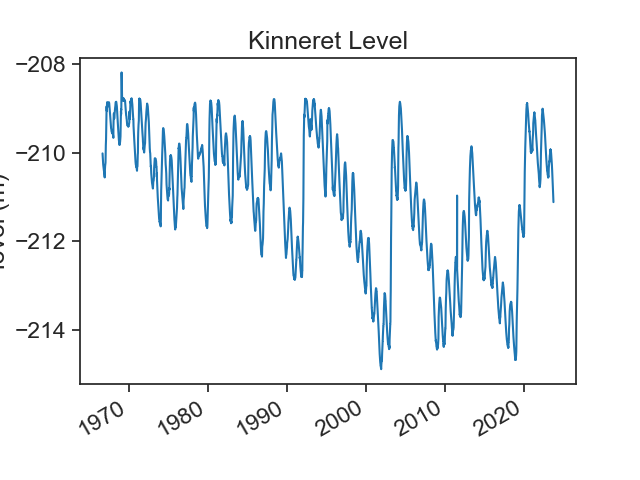

In [68]:
fig, ax = plt.subplots()
ax.plot(df['level'], color="tab:blue")
ax.set(title="Kinneret Level",
       ylabel="level (m)")
plt.gcf().autofmt_xdate()  # makes slanted dates

The data seems ok, until we take a closer look. Data points are not evenly spaced in time.

/var/folders/c3/7hp0d36n6vv8jc9hm2440__00000gn/T/ipykernel_3777/934261896.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax.plot(df.loc["1993":"1995", 'level'], color="tab:blue", marker="o")


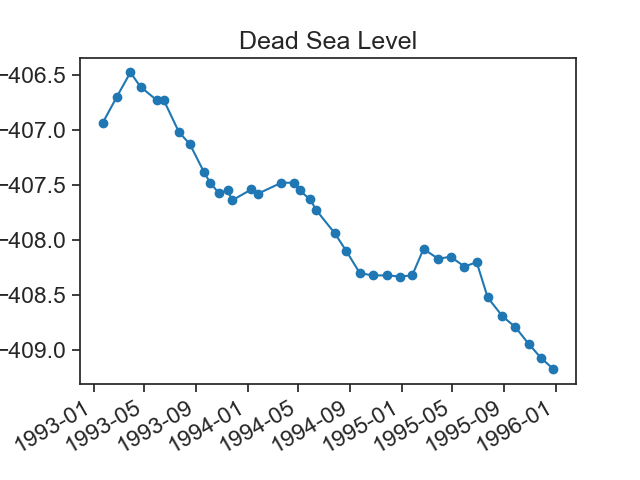

In [33]:
fig, ax = plt.subplots()
ax.plot(df.loc["1993":"1995", 'level'], color="tab:blue", marker="o")
ax.set(title="Dead Sea Level",
       ylabel="level (m)")
plt.gcf().autofmt_xdate()  # makes slanted dates

We can resample by day (a much higher rate than the original), and linearly interpolate:

In [58]:
df2 = df['level'].resample('D').interpolate('time').to_frame()
df2['level_sm'] = df2['level'].rolling('30D', center=True).mean()
df3 = df2['level'].resample('W').mean().to_frame()

/var/folders/c3/7hp0d36n6vv8jc9hm2440__00000gn/T/ipykernel_3777/2583247388.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax.plot(df.loc["1993":"1995", 'level'],


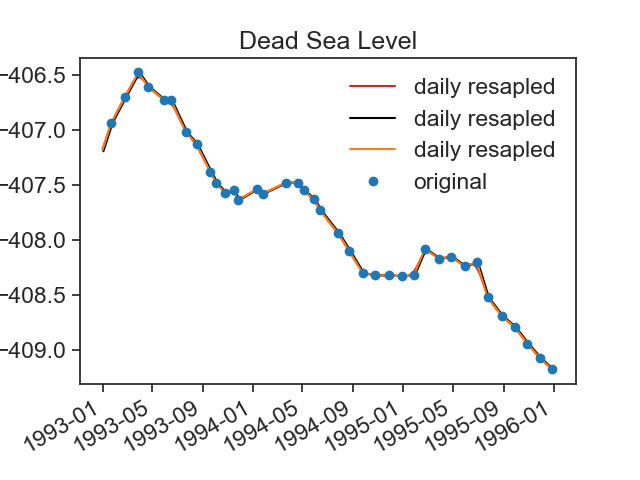

In [59]:
fig, ax = plt.subplots()
ax.plot(df2.loc["1993":"1995", 'level_sm'],
        color="tab:red",
        label="daily resapled")
ax.plot(df3.loc["1993":"1995", 'level'],
        color="black",
        label="daily resapled")
ax.plot(df2.loc["1993":"1995", 'level'],
        color="tab:orange",
        label="daily resapled")
ax.plot(df.loc["1993":"1995", 'level'],
        color="tab:blue",
        marker="o",
        linestyle="None",
        label="original")
ax.set(title="Dead Sea Level",
       ylabel="level (m)")
plt.gcf().autofmt_xdate()  # makes slanted dates
ax.legend(frameon=False)

In [62]:
df2['naive'] = df2['level'].diff()
df2['gradient'] = np.gradient(df2['level'])

df3['naive'] = df3['level'].diff()
df3['gradient'] = np.gradient(df3['level'])

[Text(0.5, 1.0, 'Dead Sea Level'), Text(0, 0.5, 'level (m)')]

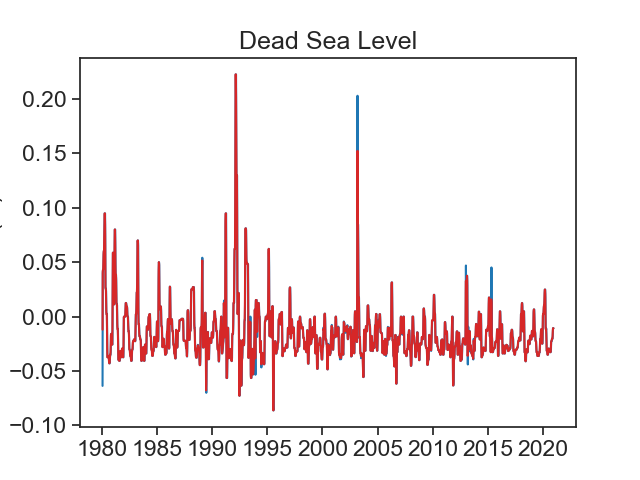

In [63]:
fig, ax = plt.subplots()
ax.plot(df3.loc["1980":"2020", 'naive'], color="tab:blue")
ax.plot(df3.loc["1980":"2020", 'gradient'], color="tab:red")
ax.set(title="Dead Sea Level",
       ylabel="level (m)")

In [45]:
df3 = df2["level"].rolling('365.24D', center=True).mean().to_frame()

[Text(0.5, 1.0, 'Dead Sea Level'), Text(0, 0.5, 'level (m)')]

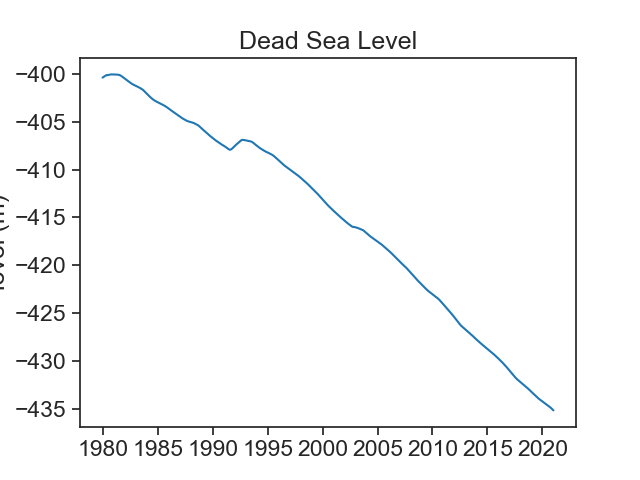

In [46]:
fig, ax = plt.subplots()
ax.plot(df3.loc["1980":"2020", 'level'], color="tab:blue")
ax.set(title="Dead Sea Level",
       ylabel="level (m)")